In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (you can replace this with any dataset)
df = sns.load_dataset('titanic')

# Show the first 5 rows of the dataset
df.head()


C:\Users\tonsi ten\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Handle Missing Values

In [3]:
# Check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# Handle missing values by imputing or dropping them

# Fill missing age values with the mean
df['age'].fillna(df['age'].mean(), inplace=True)

In [5]:
# Fill missing embarked values with the most common value (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [6]:
# Drop the 'deck' column (too many missing values)
df.drop(columns=['deck'], inplace=True)

In [7]:
# Drop rows with missing 'embark_town' and 'alive'
df.dropna(subset=['embark_town', 'alive'], inplace=True)

In [8]:
# Verify that missing values are handled
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Handle Outliers

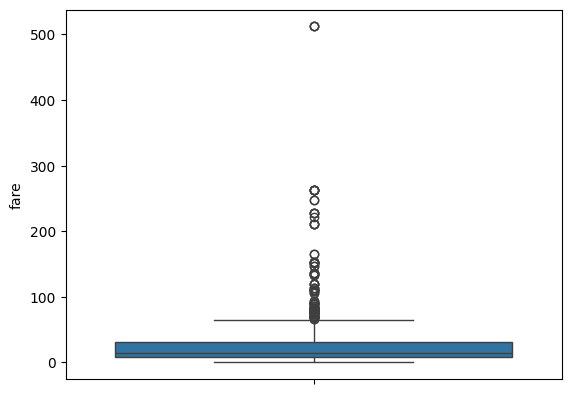

In [9]:
# Use a boxplot to detect outliers in the 'fare' column
sns.boxplot(df['fare'])
plt.show()

In [12]:
# Remove outliers using the IQR method for the 'fare' column
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [13]:
# Remove rows with outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

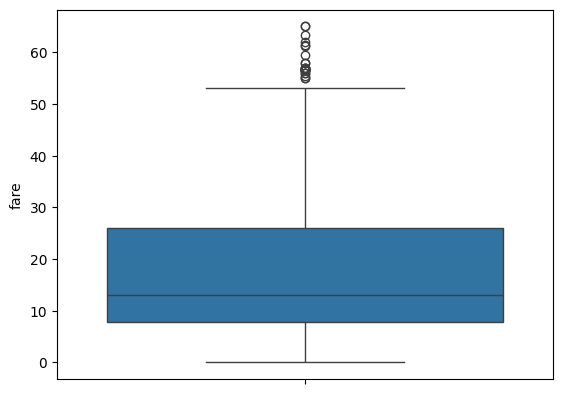

In [14]:
# Verify the outliers have been removed
sns.boxplot(df['fare'])
plt.show()

# Normalize or Scale Features

In [16]:
# Select numeric features to scale
numeric_features = ['age', 'fare', 'pclass']


In [17]:
# Option 1: Standardization (Z-score normalization)
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Option 2: Min-Max Scaling
# scaler = MinMaxScaler()
# df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the scaled features
df[numeric_features].head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,age,fare,pclass
0,-0.556219,-0.779117,0.708528
2,-0.243027,-0.729373,0.708528
3,0.461654,2.599828,-2.016580
4,0.461654,-0.720161,0.708528
5,0.046606,-0.690071,0.708528


#  Split Data into Training and Testing Sets

In [18]:
# Select features and target variable
X = df[['age', 'fare', 'pclass']]  # Features (you can select other features as well)
y = df['survived']                 # Target variable


In [19]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Show the shape of the training and testing sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (620, 3) (620,)
Testing set: (155, 3) (155,)
